In [1]:
pip install Cmake


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Importing plotly failed. Interactive plots will not work.
C:\Users\Quang Anh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
    import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv("C:/Users/Quang Anh/Downloads/Crude-Oil.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,37.60,38.39,36.33,36.76,36.76,431985
1,2016-01-05,36.90,37.10,35.74,35.97,35.97,410131
2,2016-01-06,36.18,36.39,33.77,33.97,33.97,563811
3,2016-01-07,34.09,34.26,32.10,33.27,33.27,617409
4,2016-01-08,33.30,34.34,32.64,33.16,33.16,596496


In [6]:
#Select variable
dataset = df.loc[:, ['Date','Close']]
dataset.head(5)

,Date,Close
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [7]:
train = dataset.iloc[:round(len(df) * 0.8)]
test = dataset.iloc[round(len(df) * 0.8):]

In [8]:
train

,Date,Close
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1394,2021-07-20,70.30
1395,2021-07-21,71.91
1396,2021-07-22,72.07
1397,2021-07-25,71.91


In [9]:
test

,Date,Close
1399,2021-07-27,72.39
1400,2021-07-28,73.62
1401,2021-07-29,73.95
1402,2021-08-01,71.26
1403,2021-08-02,70.56
...,...,...
1744,2022-12-06,74.25
1745,2022-12-07,72.01
1746,2022-12-08,71.46
1747,2022-12-09,71.02


In [131]:
dataset.Date = pd.to_datetime(dataset.Date, format = "%Y-%m-%d")

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1749 non-null   object 
 1   Close   1749 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.5+ KB


In [11]:
dataset = dataset.rename(columns = {'Close':'y'})
dataset = dataset.rename(columns = {'Date':'ds'})
dataset.head()

,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [12]:
train = dataset.iloc[:round(len(df) * 0.8)]
test = dataset.iloc[round(len(df) * 0.8):]

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dataset['ds'], dataset['y'], test_size=0.2)



In [14]:
mymodel = np.poly1d(np.polyfit(np.asarray(xtrain).astype(float), ytrain, 4))

myline = np.linspace(0, 6, 100)

r2 = r2_score(ytrain, mymodel(np.asarray(xtrain).astype(float)))

print(r2)

ValueError: could not convert string to float: '2019-12-10'

In [15]:
xtrain1 = pd.DataFrame(xtrain)

In [16]:
ytrain1 = pd.DataFrame(ytrain)

In [17]:
training_set= pd.concat([xtrain1, ytrain1['y']], axis=1)
training_set

,ds,y
989,2019-12-10,59.24
1028,2020-02-06,50.95
415,2017-08-28,46.44
1173,2020-09-01,41.51
1156,2020-08-09,41.94
...,...,...
579,2018-04-24,68.05
177,2016-09-14,43.91
1004,2020-01-02,61.18
1261,2021-01-08,52.24


In [18]:
len(training_set)

1399

In [19]:
xtest1 = pd.DataFrame(xtest)
ytest1 = pd.DataFrame(ytest)
test_set= pd.concat([xtest1, ytest1['y']], axis=1)
test_set


,ds,y
1492,2021-12-07,72.05
1447,2021-10-04,78.93
993,2019-12-16,60.21
1114,2020-06-09,39.60
686,2018-09-25,71.57
...,...,...
1353,2021-05-20,63.58
906,2019-08-12,57.10
868,2019-06-18,53.76
359,2017-06-08,45.83


In [20]:
test_set

,ds,y
1492,2021-12-07,72.05
1447,2021-10-04,78.93
993,2019-12-16,60.21
1114,2020-06-09,39.60
686,2018-09-25,71.57
...,...,...
1353,2021-05-20,63.58
906,2019-08-12,57.10
868,2019-06-18,53.76
359,2017-06-08,45.83


In [21]:
mymodel = np.poly1d(np.polyfit(np.asarray(xtrain).astype(float), ytrain, 4))

myline = np.linspace(0, 6, 100)

r2 = r2_score(ytest, mymodel(np.asarray(xtest).astype(float)))

print(r2)

ValueError: could not convert string to float: '2019-12-10'

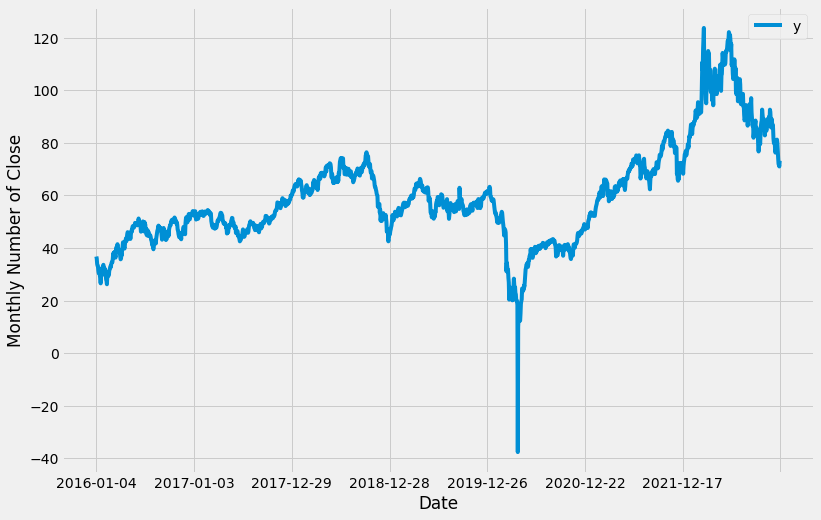

In [22]:
ax = dataset.set_index('ds').plot(figsize=(12, 8)) 
ax.set_ylabel('Monthly Number of Close') 
ax.set_xlabel('Date')  
plt.show() 

In [23]:
my_model = Prophet(interval_width=0.95)

In [144]:
my_model.fit(train) 

19:33:33 - cmdstanpy - INFO - Chain [1] start processing
19:33:34 - cmdstanpy - INFO - Chain [1] done processing


In [145]:
future_dates = my_model.make_future_dataframe(periods=len(test), freq='D') 
future_dates.tail()

,ds
1744,2022-07-07
1745,2022-07-08
1746,2022-07-09
1747,2022-07-10
1748,2022-07-11


In [146]:
#merge regressors
future_dates = pd.concat([future_dates, dataset.iloc[:,1:]],
                   axis = 1)
future_dates.tail(5)

,ds,y
1744,2022-07-07,74.25
1745,2022-07-08,72.01
1746,2022-07-09,71.46
1747,2022-07-10,71.02
1748,2022-07-11,73.17


In [147]:
#forecast
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,33.065816,23.790564,42.813276,33.065816,33.065816,-0.057494,-0.057494,-0.057494,-0.310228,-0.310228,-0.310228,0.252734,0.252734,0.252734,0.0,0.0,0.0,33.008322
1,2016-01-05,33.135938,24.097039,42.866467,33.135938,33.135938,0.213710,0.213710,0.213710,-0.154986,-0.154986,-0.154986,0.368696,0.368696,0.368696,0.0,0.0,0.0,33.349648
2,2016-01-06,33.206060,23.305554,43.234466,33.206060,33.206060,0.185330,0.185330,0.185330,-0.300347,-0.300347,-0.300347,0.485677,0.485677,0.485677,0.0,0.0,0.0,33.391390
3,2016-01-07,33.276182,24.113758,44.341548,33.276182,33.276182,0.382082,0.382082,0.382082,-0.219870,-0.219870,-0.219870,0.601953,0.601953,0.601953,0.0,0.0,0.0,33.658264
4,2016-01-08,33.346303,24.335266,44.307379,33.346303,33.346303,0.753912,0.753912,0.753912,0.038216,0.038216,0.038216,0.715696,0.715696,0.715696,0.0,0.0,0.0,34.100215


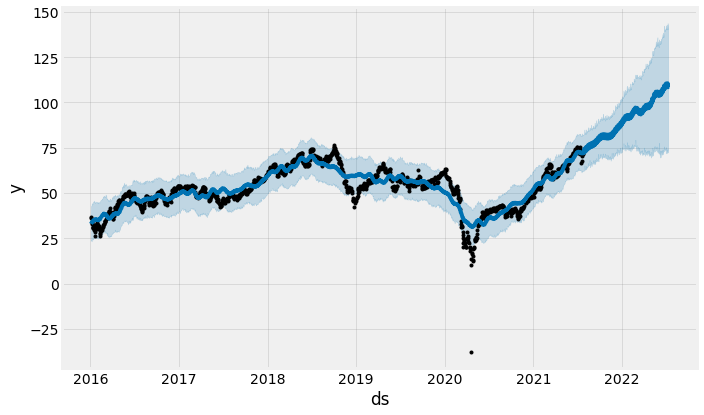

In [148]:
my_model.plot(forecast,uncertainty=True);

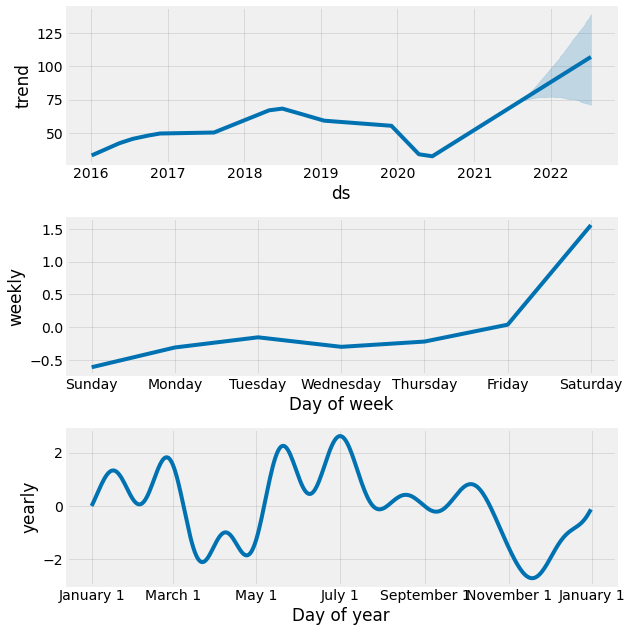

In [149]:
my_model.plot_components(forecast);

In [153]:
#predictions
predictions_prophet = forecast.yhat[-350:].rename("prophet")
predictions_prophet[:5]

1399    72.382897
1400    72.310515
1401    72.475470
1402    72.828765
1403    74.454732
Name: prophet, dtype: float64

In [154]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test['y'], predictions_prophet),0))
print(round(np.sqrt(mean_squared_error(test['y'], predictions_prophet)), 0))

11.0
14.0


In [155]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [156]:
mape(test_set['y'],predictions_prophet)

0.7009912473114741

In [157]:
#CV
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='540 days', period='1 days', horizon = '30 days')


  0%|          | 0/1461 [00:00<?, ?it/s]

19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing
19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing
19:34:21 - cmdstanpy - INFO - Chain [1] start processing
19:34:21 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing
19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing
19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing
19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:25 - cmdstanpy - INFO - Chain [1] done processing
19:34:25 - cmdstanpy - INFO - Chain [1] start processing
19:34:25 - cmdstanpy - INFO - Chain [1]

19:35:01 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:35:02 - cmdstanpy - INFO - Chain [1] start processing
19:35:02 - cmdstanpy - INFO - Chain [1] done processing
19:35:02 - cmdstanpy - INFO - Chain [1] start processing
19:35:02 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:35:03 - cmdstanpy - INFO - Chain [1] start processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing
19:35:05 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 -

19:35:33 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:35:33 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
19:35:34 - cmdstanpy - INFO - Chain [1] start processing
19:35:34 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:35:35 - cmdstanpy - INFO - Chain [1] start processing
19:35:35 - cmdstanpy - INFO - Chain [1] done processing
19:35:35 - cmdstanpy - INFO - Chain [1] start processing
19:35:35 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:35:36 - cmdstanpy - INFO - Chain [1] start processing
19:35:36 - cmdstanpy - INFO - Chain [1] done processing
19:35:37 -

19:36:05 - cmdstanpy - INFO - Chain [1] done processing
19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:07 - cmdstanpy - INFO - Chain [1] done processing
19:36:07 - cmdstanpy - INFO - Chain [1] start processing
19:36:07 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:36:08 - cmdstanpy - INFO - Chain [1] start processing
19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:08 - cmdstanpy - INFO - Chain [1] start processing
19:36:09 - cmdstanpy - INFO - Chain [1] done processing
19:36:09 - cmdstanpy - INFO - Chain [1] start processing
19:36:09 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collection

19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:39 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:36:41 - cmdstanpy - INFO - Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:42 - cmdstanpy - INFO - Chain [1] start processing
19:36:42 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:36:42 - cmdstanpy - INFO - Chain [1] start processing
19:36:42 - cmdstanpy - INFO - Chain [1] done processing
19:36:43 - cmdstanpy - INFO - Chain [1] start processing
19:36:43 - cmdstanpy - INFO - Chain [1] done processing
d

19:37:12 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:13 - cmdstanpy - INFO - Chain [1] done processing
19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:13 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:37:14 - cmdstanpy - INFO - Chain [1] start processing
19:37:14 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:37:15 - cmdstanpy - INFO - Chain [1] start processing
19:37:15 - cmdstanpy - INFO - Chain [1] done processing
19:37:15 - cmdstanpy - INFO - Chain [1] start processing
19:37:15 - cmdstanpy - INFO - Chain [1] done processing
19:37:16 - cmdstanpy - INFO - Chain [1] start processing
19:37:16 -

19:37:47 - cmdstanpy - INFO - Chain [1] start processing
19:37:47 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:37:51 - cmdstanpy - INFO - Chain [1] start processing
19:37:51 - cmdstanpy - INFO - Chain [1] done processing
distribute

19:38:24 - cmdstanpy - INFO - Chain [1] done processing
19:38:24 - cmdstanpy - INFO - Chain [1] start processing
19:38:24 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:38:25 - cmdstanpy - INFO - Chain [1] start processing
19:38:25 - cmdstanpy - INFO - Chain [1] done processing
19:38:26 - cmdstanpy - INFO - Chain [1] start processing
19:38:26 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:38:27 - cmdstanpy - INFO - Chain [1] start processing
19:38:27 - cmdstanpy - INFO - Chain [1] done processing
19:38:27 - cmdstanpy - INFO - Chain [1] start processing
19:38:27 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:38:28 - cmdstanpy - INFO - Chain [1] start processing
19:38:28 -

19:39:02 - cmdstanpy - INFO - Chain [1] start processing
19:39:03 - cmdstanpy - INFO - Chain [1] done processing
19:39:03 - cmdstanpy - INFO - Chain [1] start processing
19:39:03 - cmdstanpy - INFO - Chain [1] done processing
19:39:04 - cmdstanpy - INFO - Chain [1] start processing
19:39:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:39:05 - cmdstanpy - INFO - Chain [1] start processing
19:39:05 - cmdstanpy - INFO - Chain [1] done processing
19:39:05 - cmdstanpy - INFO - Chain [1] start processing
19:39:06 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:39:06 - cmdstanpy - INFO - Chain [1] start processing
19:39:06 - cmdstanpy - INFO - Chain [1] done processing
19:39:07 - cmdstanpy - INFO - Chain [1] start processing
19:39:07 - cmdstanpy - INFO - Chain [1] done processing
d

19:39:42 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing
19:39:43 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:39:44 - cmdstanpy - INFO - Chain [1] start processing
19:39:44 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:46 - cmdstanpy - INFO - Chain [1] done processing
19:39:46 - cmdstanpy - INFO - Chain [1] start processing
19:39:46 -

19:40:21 - cmdstanpy - INFO - Chain [1] start processing
19:40:21 - cmdstanpy - INFO - Chain [1] done processing
19:40:21 - cmdstanpy - INFO - Chain [1] start processing
19:40:22 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:40:22 - cmdstanpy - INFO - Chain [1] start processing
19:40:22 - cmdstanpy - INFO - Chain [1] done processing
19:40:23 - cmdstanpy - INFO - Chain [1] start processing
19:40:23 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:40:24 - cmdstanpy - INFO - Chain [1] start processing
19:40:24 - cmdstanpy - INFO - Chain [1] done processing
19:40:24 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:40:25 -

19:41:01 - cmdstanpy - INFO - Chain [1] start processing
19:41:01 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:41:02 - cmdstanpy - INFO - Chain [1] start processing
19:41:02 - cmdstanpy - INFO - Chain [1] done processing
19:41:02 - cmdstanpy - INFO - Chain [1] start processing
19:41:03 - cmdstanpy - INFO - Chain [1] done processing
19:41:03 - cmdstanpy - INFO - Chain [1] start processing
19:41:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:41:04 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:41:06 -

19:41:43 - cmdstanpy - INFO - Chain [1] start processing
19:41:43 - cmdstanpy - INFO - Chain [1] done processing
19:41:43 - cmdstanpy - INFO - Chain [1] start processing
19:41:43 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:41:44 - cmdstanpy - INFO - Chain [1] start processing
19:41:44 - cmdstanpy - INFO - Chain [1] done processing
19:41:45 - cmdstanpy - INFO - Chain [1] start processing
19:41:45 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:41:46 - cmdstanpy - INFO - Chain [1] start processing
19:41:46 - cmdstanpy - INFO - Chain [1] done processing
19:41:46 - cmdstanpy - INFO - Chain [1] start processing
19:41:47 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:41:47 -

19:42:22 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:42:23 - cmdstanpy - INFO - Chain [1] start processing
19:42:23 - cmdstanpy - INFO - Chain [1] done processing
19:42:24 - cmdstanpy - INFO - Chain [1] start processing
19:42:24 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:42:25 - cmdstanpy - INFO - Chain [1] start processing
19:42:25 - cmdstanpy - INFO - Chain [1] done processing
19:42:25 - cmdstanpy - INFO - Chain [1] start processing
19:42:25 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:42:26 - cmdstanpy - INFO - Chain [1] start processing
19:42:26 - cmdstanpy - INFO - Chain [1] done processing
19:42:27 - cmdstanpy - INFO - Chain [1] start processing
19:42:27 -

19:43:01 - cmdstanpy - INFO - Chain [1] start processing
19:43:01 - cmdstanpy - INFO - Chain [1] done processing
19:43:02 - cmdstanpy - INFO - Chain [1] start processing
19:43:02 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:43:03 - cmdstanpy - INFO - Chain [1] start processing
19:43:03 - cmdstanpy - INFO - Chain [1] done processing
19:43:04 - cmdstanpy - INFO - Chain [1] start processing
19:43:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:43:04 - cmdstanpy - INFO - Chain [1] start processing
19:43:05 - cmdstanpy - INFO - Chain [1] done processing
19:43:05 - cmdstanpy - INFO - Chain [1] start processing
19:43:05 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:43:06 -

19:43:42 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:43:42 - cmdstanpy - INFO - Chain [1] start processing
19:43:43 - cmdstanpy - INFO - Chain [1] done processing
19:43:43 - cmdstanpy - INFO - Chain [1] start processing
19:43:43 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:43:44 - cmdstanpy - INFO - Chain [1] start processing
19:43:44 - cmdstanpy - INFO - Chain [1] done processing
19:43:45 - cmdstanpy - INFO - Chain [1] start processing
19:43:45 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
19:43:46 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing
19:43:47 - cmdstanpy - INFO - Chain [1] start processing
19:43:47 -

19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:26 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:44:28 - cmdstanpy - INFO - Chain [1] start processing
19:44:28 - cmdstanpy - INFO - Chain [1] done processing
19:44:29 - cmdstanpy - INFO - Chain [1] start processing
19:44:29 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:44:30 - cmdstanpy - INFO - Chain [1] start processing
19:44:30 - cmdstanpy - INFO - Chain [1] done processing
19:44:30 - cmdstanpy - INFO - Chain [1] start processing
19:44:31 - cmdstanpy - INFO - Chain [1] done processing
19:44:31 - cmdstanpy - INFO - Chain [1] start processing
19:44:32 - cmdstanpy - INFO - Chain [1] done processing
d

19:45:12 - cmdstanpy - INFO - Chain [1] done processing
19:45:12 - cmdstanpy - INFO - Chain [1] start processing
19:45:12 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:45:13 - cmdstanpy - INFO - Chain [1] start processing
19:45:13 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:14 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:45:15 - cmdstanpy - INFO - Chain [1] start processing
19:45:15 - cmdstanpy - INFO - Chain [1] done processing
19:45:16 - cmdstanpy - INFO - Chain [1] start processing
19:45:16 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:45:17 - cmdstanpy - INFO - Chain [1] start processing
19:45:17 -

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:45:59 - cmdstanpy - INFO - Chain [1] start processing
19:45:59 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:01 - cmdstanpy - INFO - Chain [1] done processing
19:46:01 - cmdstanpy - INFO - Chain [1] start processing
19:46:02 - cmdstanpy - INFO - Chain [1] done processing
19:46:02 - cmdstanpy - INFO - Chain [1] start processing
19:46:03 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:46:03 - cmdstanpy - INFO - Chain [1] start processing
19:46:04 - cmdstanpy - INFO - Chain [1] done processing
19:46:04 -

19:46:47 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:46:48 - cmdstanpy - INFO - Chain [1] start processing
19:46:48 - cmdstanpy - INFO - Chain [1] done processing
19:46:49 - cmdstanpy - INFO - Chain [1] start processing
19:46:49 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:46:50 - cmdstanpy - INFO - Chain [1] start processing
19:46:50 - cmdstanpy - INFO - Chain [1] done processing
19:46:51 - cmdstanpy - INFO - Chain [1] start processing
19:46:51 - cmdstanpy - INFO - Chain [1] done processing
19:46:51 - cmdstanpy - INFO - Chain [1] start processing
19:46:51 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:46:52 - cmdstanpy - INFO - Chain [1] start processing
19:46:52 -

19:47:35 - cmdstanpy - INFO - Chain [1] start processing
19:47:35 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:47:36 - cmdstanpy - INFO - Chain [1] start processing
19:47:36 - cmdstanpy - INFO - Chain [1] done processing
19:47:37 - cmdstanpy - INFO - Chain [1] start processing
19:47:37 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:47:38 - cmdstanpy - INFO - Chain [1] start processing
19:47:38 - cmdstanpy - INFO - Chain [1] done processing
19:47:38 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:40 -

19:48:19 - cmdstanpy - INFO - Chain [1] start processing
19:48:19 - cmdstanpy - INFO - Chain [1] done processing
19:48:20 - cmdstanpy - INFO - Chain [1] start processing
19:48:20 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:48:21 - cmdstanpy - INFO - Chain [1] start processing
19:48:21 - cmdstanpy - INFO - Chain [1] done processing
19:48:21 - cmdstanpy - INFO - Chain [1] start processing
19:48:22 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:48:22 - cmdstanpy - INFO - Chain [1] start processing
19:48:22 - cmdstanpy - INFO - Chain [1] done processing
19:48:23 - cmdstanpy - INFO - Chain [1] start processing
19:48:23 - cmdstanpy - INFO - Chain [1] done processing
19:48:24 - cmdstanpy - INFO - Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
d

19:49:00 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:02 - cmdstanpy - INFO - Chain [1] start processing
19:49:02 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:49:03 - cmdstanpy - INFO - Chain [1] start processing
19:49:03 - cmdstanpy - INFO - Chain [1] done processing
19:49:04 - cmdstanpy - INFO - Chain [1] start processing
19:49:04 - cmdstanpy - INFO - Chain [1] done processing
19:49:04 - cmdstanpy - INFO - Chain [1] start processing
19:49:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:49:05 - cmdstanpy - INFO - Chain [1] start processing
19:49:06 -

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:49:48 - cmdstanpy - INFO - Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
19:49:48 - cmdstanpy - INFO - Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
19:49:49 - cmdstanpy - INFO - Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:49:50 - cmdstanpy - INFO - Chain [1] start processing
19:49:50 - cmdstanpy - INFO - Chain [1] done processing
19:49:51 - cmdstanpy - INFO - Chain [1] start processing
19:49:51 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:49:52 - cmdstanpy - INFO - Chain [1] start processing
19:49:52 - cmdstanpy - INFO - Chain [1] done processing
19:49:53 -

19:50:34 - cmdstanpy - INFO - Chain [1] start processing
19:50:34 - cmdstanpy - INFO - Chain [1] done processing
19:50:35 - cmdstanpy - INFO - Chain [1] start processing
19:50:35 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:50:38 - cmdstanpy - INFO - Chain [1] start processing
19:50:39 - cmdstanpy - INFO - Chain [1] done processing
19:50:39 - cmdstanpy - INFO - Chain [1] start processing
19:50:39 - cmdstanpy - INFO - Chain [1] done processing
d

19:51:19 - cmdstanpy - INFO - Chain [1] done processing
19:51:20 - cmdstanpy - INFO - Chain [1] start processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
19:51:21 - cmdstanpy - INFO - Chain [1] done processing
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
19:51:22 - cmdstanpy - INFO - Chain [1] done processing
19:51:22 - cmdstanpy - INFO - Chain [1] start processing
19:51:23 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:51:23 - cmdstanpy - INFO - Chain [1] start processing
19:51:23 - cmdstanpy - INFO - Chain [1] done processing
19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:24 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collection

19:52:06 - cmdstanpy - INFO - Chain [1] start processing
19:52:06 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:52:07 - cmdstanpy - INFO - Chain [1] start processing
19:52:07 - cmdstanpy - INFO - Chain [1] done processing
19:52:08 - cmdstanpy - INFO - Chain [1] start processing
19:52:08 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:52:09 - cmdstanpy - INFO - Chain [1] start processing
19:52:09 - cmdstanpy - INFO - Chain [1] done processing
19:52:10 - cmdstanpy - INFO - Chain [1] start processing
19:52:10 - cmdstanpy - INFO - Chain [1] done processing
19:52:10 - cmdstanpy - INFO - Chain [1] start processing
19:52:11 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:52:11 -

19:52:58 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:52:59 - cmdstanpy - INFO - Chain [1] start processing
19:53:00 - cmdstanpy - INFO - Chain [1] done processing
19:53:00 - cmdstanpy - INFO - Chain [1] start processing
19:53:01 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:53:02 - cmdstanpy - INFO - Chain [1] start processing
19:53:02 - cmdstanpy - INFO - Chain [1] done processing
19:53:03 - cmdstanpy - INFO - Chain [1] start processing
19:53:03 - cmdstanpy - INFO - Chain [1] done processing
19:53:04 - cmdstanpy - INFO - Chain [1] start processing
19:53:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
19:53:05 - cmdstanpy - INFO - Chain [1] start processing
19:53:06 -

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:53:57 - cmdstanpy - INFO - Chain [1] start processing
19:53:57 - cmdstanpy - INFO - Chain [1] done processing
19:53:58 - cmdstanpy - INFO - Chain [1] start processing
19:53:58 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:53:59 - cmdstanpy - INFO - Chain [1] start processing
19:53:59 - cmdstanpy - INFO - Chain [1] done processing
19:54:00 - cmdstanpy - INFO - Chain [1] start processing
19:54:00 - cmdstanpy - INFO - Chain [1] done processing
19:54:01 - cmdstanpy - INFO - Chain [1] start processing
19:54:01 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
19:54:02 - cmdstanpy - INFO - Chain [1] start processing
19:54:02 - cmdstanpy - INFO - Chain [1] done processing
19:54:03 -

In [158]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-28,42.061556,39.220188,44.907564,44.93,2017-06-27
1,2017-06-29,41.796714,39.009537,44.835316,46.04,2017-06-27
2,2017-07-03,40.786977,37.665678,43.578867,47.07,2017-06-27
3,2017-07-04,40.374227,37.495034,43.339532,45.13,2017-06-27
4,2017-07-05,39.986514,36.985287,42.756382,45.52,2017-06-27


In [32]:
dataset.head()

,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [159]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,79.002207,8.888319,6.287066,0.151446,0.072526,0.139570,0.680358
1,5 days,82.233500,9.068269,6.441315,0.154872,0.076034,0.142743,0.668315
2,6 days,85.598180,9.251928,6.594841,0.158269,0.078562,0.145890,0.656946
3,7 days,89.492852,9.460066,6.761505,0.162061,0.079970,0.149303,0.642059
4,8 days,94.432288,9.717628,6.971491,0.166924,0.082940,0.153624,0.624945


C:\Users\Quang Anh\anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Quang Anh\anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


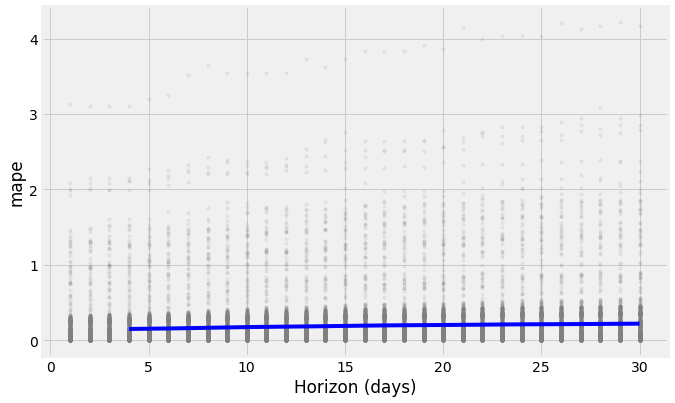

In [160]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [161]:
from dask.distributed import Client



client = Client()  # connect to the cluster

df_cv = cross_validation(my_model, initial='360 days', period='1 days', horizon='30 days',

                         parallel="processes")

C:\Users\Quang Anh\anaconda3\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56210 instead
  warnings.warn(
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage col

In [162]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': np.arange(5,10,5)
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(dataset)  # Fit model with given params
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
22:08:39 - cmdstanpy - INFO - Chain [1] start processing
22:08:39 - cmdstanpy - INFO - Chain [1] done processing
22:08:39 - cmdstanpy - INFO - Chain [1] start processing
22:08:39 - cmdstanpy - INFO - Chain [1] done processing
22:08:40 - cmdstanpy - INFO - Chain [1] start processing
22:08:40 - cmdstanpy - INFO - Chain [1] done processing
22:08:40 - cmdstanpy - INFO - Chain [1] start processing
22:08:40 - cmdstanpy - INFO - Chain [1] done processing
22:08:41 - cmdstanpy - INFO - Chain [1] start processing
22:08:41 - cmdstanpy - INFO - Chain [1] done processing
22:08:41 - cmdstanpy - INFO - Chain [1] start processing
22:08:41 - cmdstanpy - INFO - Chain [1] done processing
22:08:42 - cmdstanpy - INFO - Chain [1] start processing
22:08:42 - cmdstanpy - INFO - Chain [1] done processing
22:08:42 - cmdstanpy - INFO - Chain [1] start processing
22:08:42 - cmdstanpy - INFO - Chain [1] done pro

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                     5   
1                     0.001                     0.10                     5   
2                     0.001                     1.00                     5   
3                     0.001                    10.00                     5   
4                     0.010                     0.01                     5   
5                     0.010                     0.10                     5   
6                     0.010                     1.00                     5   
7                     0.010                    10.00                     5   
8                     0.100                     0.01                     5   
9                     0.100                     0.10                     5   
10                    0.100                     1.00                     5   
11                    0.100                    10.00            

In [163]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 5}


In [164]:
#build model
model = Prophet(growth = "linear",
          yearly_seasonality = True,
          weekly_seasonality = True,
          daily_seasonality = False,
          seasonality_mode = "multiplicative",
          seasonality_prior_scale = best_params['seasonality_prior_scale'],
          holidays_prior_scale = best_params['holidays_prior_scale'],
          changepoint_prior_scale = best_params['changepoint_prior_scale'])
model.fit(train)

22:09:56 - cmdstanpy - INFO - Chain [1] start processing
22:09:56 - cmdstanpy - INFO - Chain [1] done processing


In [165]:
#Create Future Dataframe
future_dates = my_model.make_future_dataframe(periods=len(test), freq='D')
future_dates = pd.concat([future_dates, dataset.iloc[:,1:]],
                   axis = 1)
future_dates.tail(1)


,ds,y
1748,2022-07-11,73.17


In [166]:
#forecast
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,33.065816,23.333555,43.083002,33.065816,33.065816,-0.057494,-0.057494,-0.057494,-0.310228,-0.310228,-0.310228,0.252734,0.252734,0.252734,0.0,0.0,0.0,33.008322
1,2016-01-05,33.135938,23.404454,43.058240,33.135938,33.135938,0.213710,0.213710,0.213710,-0.154986,-0.154986,-0.154986,0.368696,0.368696,0.368696,0.0,0.0,0.0,33.349648
2,2016-01-06,33.206060,22.891648,43.543901,33.206060,33.206060,0.185330,0.185330,0.185330,-0.300347,-0.300347,-0.300347,0.485677,0.485677,0.485677,0.0,0.0,0.0,33.391390
3,2016-01-07,33.276182,24.920638,43.562905,33.276182,33.276182,0.382082,0.382082,0.382082,-0.219870,-0.219870,-0.219870,0.601953,0.601953,0.601953,0.0,0.0,0.0,33.658264
4,2016-01-08,33.346303,24.010188,43.312328,33.346303,33.346303,0.753912,0.753912,0.753912,0.038216,0.038216,0.038216,0.715696,0.715696,0.715696,0.0,0.0,0.0,34.100215


In [167]:
#extract predictions
predictions_prophet_tuned = forecast.yhat[:len(test)].rename("prophet_tuned")
predictions_prophet_tuned.index = test["ds"]
predictions_prophet_tuned.head()

ds
2021-07-27    33.008322
2021-07-28    33.349648
2021-07-29    33.391390
2021-08-01    33.658264
2021-08-02    34.100215
Name: prophet_tuned, dtype: float64